In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In the following, we will try to fit an exponential function to  best approximate the data. The data is of the form $y = ae^x + b$. 

In [43]:
def generate_random_points (a, b, num_points, abs_value, abs_noise):
    # randomly select x
    x = np.random.uniform(-abs_value, abs_value, num_points)
    # y = mx + b + noise
    y = a*np.exp(x) + b + np.random.uniform(-abs_noise, abs_noise, num_points)
    return x, y

def plot_points(x,y):
    plt.scatter(x, y)
    plt.title('Scatter plot of x and y')
    plt.xlabel('x')
    plt.ylabel('y')

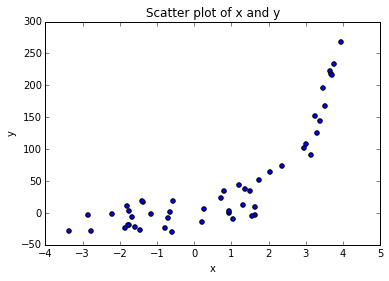

In [44]:
a = 5.4
b = -3
num_points = 50
abs_value = 4
abs_noise = 30
x, y = generate_random_points (a, b, num_points, abs_value, abs_noise)
plot_points(x, y)

If $N$ = num_points, then the error in fitting a line to the points (also defined as Cost, $C$) can be defined as:


$C = \sum_{i=0}^{N} (y-(ae^x+b))^2$

To perform gradient descent, we need the partial derivatives of Cost $C$ with respect to slope $m$ and intercept $b$.

$\frac{\partial C}{\partial a} = \sum_{i=0}^{N} -2(y-(ae^x+b)).e^x$

$\frac{\partial C}{\partial b} = \sum_{i=0}^{N} -2(y-(ae^x+b))$

In [45]:
# this function computes gradient with respect to a
def grad_m (x, y, a, b):
    return np.sum(np.multiply(-2*(y - (a*np.exp(x) + b)), np.exp(x)))

# this function computes gradient with respect to b
def grad_b (x, y, a, b):
    return np.sum(-2*(y - (a*np.exp(x) + b)))

# Performs gradient descent
def gradient_descent (x, y, num_iterations, learning_rate):
    # Initialize m and b
    a = np.random.uniform(-1, 1, 1)
    b = np.random.uniform(-1, 1, 1)
    # Update m and b in direction opposite to that of the gradient to minimize loss 
    for i in range(num_iterations):
        a = a - learning_rate * grad_m (x, y, a, b)
        b = b - learning_rate * grad_b (x, y, a, b)
    # Return final slope and intercept
    return a, b

# Plot point along with the best fit line
def plot_curve (a, b, x, y):
    plot_points(x,y)
    xval = np.linspace(np.amin(x), np.amax(x), num=len(x))
    plt.plot(xval, np.exp(xval)*a + b, 'r')
    plt.show()

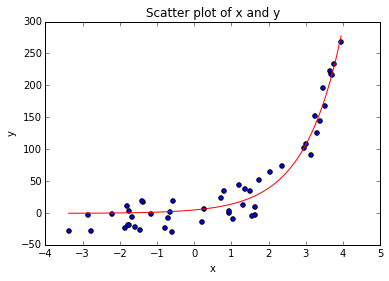

In [46]:
# In general, keep num_iterations high and learning_rate low.
num_iterations =  2000
learning_rate = 0.000001

a, b = gradient_descent (x, y, num_iterations, learning_rate)
plot_curve (a, b, x, y)
plt.show()